import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat 
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit

In [81]:
Nr=np.genfromtxt('Rhodium.dat', usecols=(1)) #Anzahlen der Zerfälle einlesen
t=np.genfromtxt('Rhodium.dat', usecols=(0)) #Anzahlen der Zerfälle einlesen
X=[0]
Ngem=X*len(Nr)
Nf=np.sqrt(Nr) #Fehlerberechnung mittels Poissonverteilung
a=0
while a<len(Nr):
    Ngem[a]=ufloat(Nr[a],Nf[a]) #Gemessene Impulse als Fehlerbehaftete Größe
    a=a+1

NUr=[129, 143, 144, 136, 139, 126, 158] #Untergrundstrahlung in Impulse/300s
NUf=np.sqrt(NUr)
b=0
NU=X*len(NUr)
while b<len(NUr):
    NU[b]=ufloat(NUr[b],NUf[b]) #Gemessene Impulse des Untergrundes als Fehlerbehaftete Größe
    b=b+1
NUm=np.mean(NU)/20 #Mittelwert der Untergrundstrahlung durch 20 also für 15s

print(NUm)
N=X*len(Ngem)
e=0
while e< len(Ngem):
    N[e]=Ngem[e]-NUm
    e=e+1
print(N)

6.96+/-0.22
[660.0357142857143+/-25.827306187404815, 578.0357142857143+/-24.187801572238, 467.0357142857143+/-21.7726834565232, 392.0357142857143+/-19.976229496528095, 297.0357142857143+/-17.437022248593916, 246.03571428571428+/-15.90753736119954, 206.03571428571428+/-14.59622365195735, 166.03571428571428+/-13.154837319327031, 145.03571428571428+/-12.330845262915238, 119.03571428571429+/-11.227187755531622, 104.03571428571429+/-10.538014276796135, 85.03571428571429+/-9.59425582825261, 72.03571428571429+/-8.890992346074716, 67.03571428571429+/-8.605216144755412, 53.035714285714285+/-7.749177046497208, 45.035714285714285+/-7.214550914503215, 49.035714285714285+/-7.48663775656063, 46.035714285714285+/-7.283525581609444, 34.035714285714285+/-6.407007483838238, 29.035714285714285+/-6.004143977117736, 30.035714285714285+/-6.0868501622726985, 25.035714285714285+/-5.661249411389609, 29.035714285714285+/-6.004143977117736, 31.035714285714285+/-6.168447527373414, 27.035714285714285+/-5.835215925

44
[33.035714285714285, 14.035714285714286, 28.035714285714285, 26.035714285714285, 29.035714285714285, 13.035714285714286, 17.035714285714285, 23.035714285714285, 23.035714285714285, 19.035714285714285, 21.035714285714285, 16.035714285714285, 13.035714285714286, 21.035714285714285, 10.035714285714286, 19.035714285714285, 12.035714285714286, 6.0357142857142865, 10.035714285714286, 0, 0]
a = 1944.551 ± 349.657
b =    0.004 ± 0.001
44


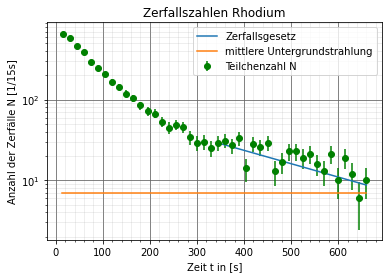

In [73]:
Nffrei=X*len(N)
c=0
while c<len(N):
    Nffrei[c]=N[c].nominal_value
    c=c+1
Nfehler=X*len(N)
d=0
while d<len(N):
    Nfehler[d]=N[d].std_dev
    d=d+1

y=np.linspace(0,660)
x2 = np.linspace(345, 660)
t2=np.linspace(345,660,21)
def Zerfallsgesetz(t,Nnull, lamda):
    return Nnull*(1-np.exp(-1*lamda*15))*np.exp(-lamda*t)
N2=X*21
print(len(Nffrei))
f=25
g=0
while f<len(Nffrei):
    N2[g]=Nffrei[f]
    f=f+1
    g=g+1
print(N2)
params, covariance_matrix = curve_fit(Zerfallsgesetz, t2, N2, bounds=(0, [4000., 0.01]))

uncertainties = np.sqrt(np.diag(covariance_matrix))

for name, value, uncertainty in zip('ab', params, uncertainties): 
    print(f'{name} = {value:8.3f} ± {uncertainty:.3f}')

plt.plot(x2, Zerfallsgesetz(x2, *params), "-", label='Zerfallsgesetz')
plt.plot(y,(y/y)*NUm.nominal_value , label='mittlere Untergrundstrahlung')
plt.errorbar(t ,Nffrei, yerr=Nfehler, fmt='go', label='Teilchenzahl N')
plt.title('Zerfallszahlen Rhodium')
plt.xlabel('Zeit t in [s]')
plt.ylabel('Anzahl der Zerfälle N [1/15s]')
plt.yscale('log')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(loc='best')
plt.savefig("rhodium.pdf")
print(len(Nffrei))

a = 2930.865 ± 48.629
b =    0.015 ± 0.000


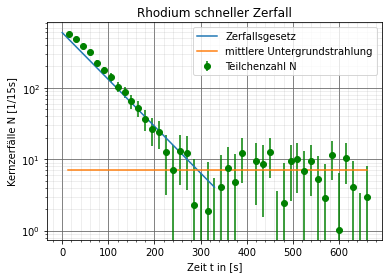

In [80]:
def Zerfallsgesetz2(t,Nnull2, lamda2):
    return Nnull2*(1-unp.exp(-1*lamda2*15))*unp.exp(-lamda2*t)
t1=np.linspace(0,330,22)
lambda2=ufloat(0.004,0.001)
N02=ufloat(1705.993,225.722)
N01=N-Zerfallsgesetz2(t,N02,lambda2)

N01ffrei=X*len(N01)
h=0
while h<len(N01):
    N01ffrei[h]=N01[h].nominal_value
    h=h+1
N01fehler=X*len(N01)
i=0
while i<len(N01):
    N01fehler[i]=N01[i].std_dev
    i=i+1

N1=X*22
j=0
while j<22:
    N1[j]=N01ffrei[j]
    j=j+1

##########################################################################################
#Interpolation
t1=np.linspace(0,330,22)
params2, covariance_matrix = curve_fit(Zerfallsgesetz, t1, N1, bounds=(0, [40000., 0.1]))

uncertainties = np.sqrt(np.diag(covariance_matrix))

for name, value, uncertainty in zip('ab', params2, uncertainties): 
    print(f'{name} = {value:8.3f} ± {uncertainty:.3f}')
##########################################################################################



plt.plot(t1, Zerfallsgesetz(t1, *params2), "-", label='Zerfallsgesetz')
plt.errorbar(t ,N01ffrei, yerr=N01fehler, fmt='go', label='Teilchenzahl N')
plt.yscale("log")
plt.plot(y,(y/y)*NUm.nominal_value , label='mittlere Untergrundstrahlung')
plt.yscale('log')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(loc='best')
plt.title("Rhodium schneller Zerfall")
plt.ylabel("Kernzerfälle N [1/15s]")
plt.xlabel("Zeit t in [s]")
plt.savefig("rhodium1.pdf")

In [82]:
datenRh1=np.array([t,
                Nr,
                Nf])

datenRh1TR=np.transpose(datenRh1)
np.savetxt("datenRhodium1.tex",datenRh1TR, fmt="%2.3f", delimiter="  &   ")

In [83]:
datenRh2=np.array([t,
                Nffrei,
                Nfehler])

datenRh2TR=np.transpose(datenRh2)
np.savetxt("datenRhodium2.tex",datenRh2TR, fmt="%2.3f", delimiter="  &   ")

datenRh3=np.array([t,
                N01ffrei,
                N01fehler])

datenRh3TR=np.transpose(datenRh3)
np.savetxt("datenRhodium3.tex",datenRh3TR, fmt="%2.3f", delimiter="  &   ")

In [2]:
#Halbwertszeiten
lam1=ufloat(0.004,0.001)
lam2=ufloat( 0.015,0.000)
Thalb1=np.log(2)/lam1
Thalb2=np.log(2)/lam2
print('Halbwertszeiten',Thalb1,Thalb2)

Halbwertszeiten (1.7+/-0.4)e+02 46.20981203732969+/-0
